<a href="https://colab.research.google.com/github/elbergyn/python/blob/master/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
from scipy.optimize import curve_fit # biblioteca necessária para realiza a otimização dos MSE

In [0]:
idade=[18,25,57,45,26,64,37,40,24,33]
salarioAnual=[15000,29000,68000,52000,32000,80000,41000,45000,26000,33000]

xData = np.array(idade)
yData = np.array(salarioAnual)

In [0]:
#define a função a ser otimizada (regressão linear)
def equacaoLinear(x, a, b):
  return a * x + b

In [0]:
#gera os parametros iniciais para o otimizador
parametrosInicias = np.array([1.0,1.0])

In [0]:
#realiza a otimização através do erro médio quadrado (MSE)
parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData, parametrosInicias)
#parametrosOtimizados - contém os parametros de ajuste da curva
#pcov - contém a covariância dos parâmetros encontrados

In [0]:
#realiza a previsão dos dados através do modelo (constroi a equação linear)
previsaoModelo = equacaoLinear(xData, *parametrosOtimizados)#utiliza a função linear com os parâmetros otimizados

In [0]:
#encontra o erro absoluto (linhas verticais)
erroAbsoluto = previsaoModelo - yData #valor previsto - valor real

In [0]:
#calcula o erro quadrado entre cada medida
SE = np.square(erroAbsoluto)
#calcula o MSE
MSE = np.mean(SE)
print('SE: ', SE)
print('MSE: ', MSE)

In [0]:
#REALIZA O CALCULO DO COEFICIENTE DE DETERMINAÇÃO
rsquared = 1.0 - (np.var(erroAbsoluto) / np.var(yData)) #numpy.var - encontra a variância entre os dados do vetor
print('Coeficiente de Determinação: ', rsquared)

In [0]:
#mostra os parâmetros da regressão
print('Y = {}X {}'.format(parametrosOtimizados[0], parametrosOtimizados[1]))

In [0]:
#realiza o plot da figura
f = plt.figure(figsize=(4,4), dpi=100)#indica o tamanho da figura
axes = f.add_subplot(111)#cria os objetos para o subplot

#frealiza o plat dos dados (pontos no gráfico
axes.plot(xData, yData, 'ro')

#cria os dados para serem utilizados na contrução da linha (equação)
xModel = np.linspace(min(xData), max(xData))
yModel = equacaoLinear(xModel, *parametrosOtimizados)#aplica a função com os parametros obtidos

#realiza o plot da "linha"
axes.plot(xModel, yModel)
plt.xlabel("Idade")
plt.ylabel("Salário Anual R$")



Mesmo código utilizando sklearn para construir a regressão linear

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #realiza o cálculo do R2

In [0]:
reg = LinearRegression()
x_ModeloSklearn=xData.reshape((-1,1))#na regressão linear é necessário que o seja 2D
regressao = reg.fit(x_ModeloSklearn, yData)

In [0]:
previsao=reg.predict(x_ModeloSklearn)

In [33]:
MSE=mean_squared_error(yData, previsao)#encontra o MSE através do sklearn
print('MSE: ', MSE)

MSE:  5479238.909036706


In [35]:
print("Y = {}X {}".format(reg.coef_,reg.intercept_))

R_2 = r2_score(yData, previsao) #realiza o cálculo do R2

print("Coeficiente de Determinação (R2)", R_2)

Y = [1320.53256496]X -6627.651646877624
Coeficiente de Determinação (R2) 0.9846300347582353


Será realizado a construção de uma regressão para um banco de dados real

In [37]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [0]:
data=pd.read_csv('headbrain.csv')

In [40]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [0]:
#como o formato dos dados em cada uma das colunas do dataframe são séries é necessário converter array
x=data["Head Size(cm^3)"].values
y=data["Brain Weight(grams)"].values

In [0]:
#realiza a construção do modelo de regressão
reg=LinearRegression()
x_Reshaped=x.reshape((-1,1))#coloca os dados no formato 2D
regressao=reg.fit(x_Reshaped, y) #encontra os coeficientes (realiza a regressão)

In [0]:
#realiza a previsão
previsao=reg.predict(x_Reshaped)

In [48]:
#parametros encontrados
print("Y = {}X {}".format(reg.coef_, reg.intercept_))

R_2 = r2_score(y, previsao)

print("Coeficiente de Determinação (R2): ", R_2)

Y = [0.26342934]X 325.5734210494426
Coeficiente de Determinação (R2):  0.639311719957


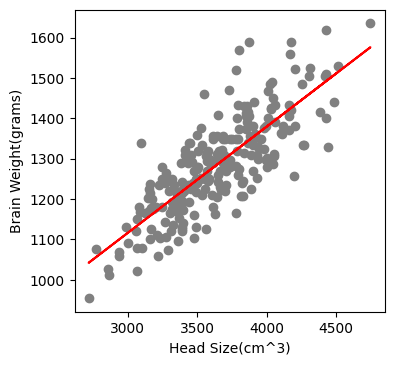

In [50]:
#realiza o plot dos dados
plt.figure(figsize=(4,4), dpi=100)
plt.scatter(x, y, color='gray')
plt.plot(x, previsao, color="red")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()